In [107]:
import numpy as np


def train_params(xs, ys, C, ker, iter=30):
    k_eps = 1e-5

    n = len(xs)

    a = np.zeros(n)
    b = 0

    a_prev = np.copy(a)
    for it in range(iter):
        for i in range(n):
            # iterate over all alpha_i

            # if (ys[i] * E_i < -tol and a[i] < C) or (ys[i] * E_i > tol and a[i] > 0):
            # randomly pick j neq i
            j = int(np.concatenate((np.array(range(0, i)), np.array(range(i+1, n)))) [np.random.randint(0, n-2)])

            L = np.max((0, a[j] - a[i]))
            H = np.min((C, C+ a[j] - a[i]))
            if ys[i] == ys[j]:
                L = np.max((0, a[j] + a[i] - C))
                H = np.min((C, a[j] + a[i]))

            if L == H:
                # print("L == H!")
                continue

            nu = 2 * ker(xs[i], xs[j]) - ker(xs[i], xs[i]) - ker(xs[j], xs[i])
            # if nu >= 0:
            #     print("nu wrong!")
            #     continue
            if nu == 0:
                continue

            # w = np.dot(xs, a * ys)
            # b_const = np.mean(ys - np.dot(xs, w))

            # E_i = get_E(xs[i], ys[i], w, b_const)
            # E_j = get_E(xs[j], ys[j], w, b_const)

            E_i = get_E(xs[i], ys[i], xs, ys, a, b, ker)
            E_j = get_E(xs[j], ys[j], xs, ys, a, b, ker)


            aj_new = a[j] - ys[j] * (E_i - E_j) / nu
            aj_new = np.clip(aj_new, L, H)

            if np.abs(aj_new - a[j]) < k_eps:
                # print("smaller than epsilon!")
                continue

            ai_new = a[i] + ys[i] * ys[j] * (a[j] - aj_new)

            i_cond = a[i] < C and a[i] > 0
            j_cond = a[j] < C and a[j] > 0

            b_1 = b - E_i - ys[i] * (ai_new - a[i]) * ker(xs[i], xs[i]) - ys[j] \
                  * (aj_new - a[j]) * ker(xs[i], xs[j])
            b_2 = b - E_j - ys[i] * (ai_new - a[i]) * ker(xs[i], xs[j]) - ys[j] \
                  * (aj_new - a[j]) * ker(xs[j], xs[j])

            if i_cond and j_cond:
                b = np.average((b_1, b_2))
            elif i_cond:
                b = b_1
            elif j_cond:
                b = b_2

            a[i] = ai_new
            a[j] = aj_new

        norm = np.linalg.norm(a_prev - a)
        # print(norm)
        if norm < k_eps:
            break
        a_prev = a
    return a, b


# def get_E(x, y, w, b):
#     return np.sign(np.dot(w, x) + b) - y

def get_E(x, y, xs, ys, a, b, ker):
    return np.sign(compute_lin(x, xs, ys, a, b, ker)) - y


def lin_ker(a, b):
    return np.dot(a, b)


def spec_ker(a, b):
    return 1 if np.linalg.norm(a-b) < 1e-5 else 0


def compute_lin(x, xs, ys, a, b, ker):
    rv = 0
    for i in range(len(xs)):
        rv += a[i] * ys[i] * ker(x, xs[i])
    rv += b
    return rv


def classify_SVM(x, xs, ys, a, b, ker):
    return 1 if compute_lin(x, xs, ys, a, b, ker) >= 0 else -1


def classify_LR(x, xs, ys, a, b, ker):
    return -1 if 1 / (1 + np.exp(-compute_lin(x, xs, ys, a, b, ker))) < 0.5 else 1
    # TODO check boundary?


In [50]:
mu = 2.5
cov = np.identity(2)

n_pts = 750

pos = np.concatenate((np.random.multivariate_normal([mu, 0], cov, n_pts), np.ones((n_pts, 1))), axis=1)
neg = np.concatenate((np.random.multivariate_normal([-mu, 0], cov, n_pts), -np.ones((n_pts, 1))), axis=1)
pts = np.concatenate((pos, neg))
np.random.shuffle(pts)

d_train = pts[:1000]
d_valid = pts[1000:1250]
d_test = pts[1250:]

xs = d_train[:,:-1]
ys = d_train[:,-1]

In [51]:
import matplotlib.pyplot as plt

def plot_preds(pred_y, title):
    for i in range(len(d_test)):
        x = d_test[i][:-1]
        y = d_test[i][-1]
        color = "g" if y == 1 else "r"  # actual
        mark = "o" if pred_y[i] == 1 else "x"
        plt.scatter(x[0], x[1], c=color, marker=mark)
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

In [52]:
a, b = train_params(xs, ys, 0.5, lin_ker)

print(a)
print(b)
print("done!")

/var/folders/t9/gxb6q8zj21dff090q066td740000gn/T/ipykernel_1732/1208863680.py:19: DeprecationWarning: This function is deprecated. Please call randint(0, 998 + 1) instead
  j = int(np.concatenate((np.array(range(0, i)), np.array(range(i+1, n)))) [np.random.random_integers(0, n-2)])


1.559803358075802
0.0
[0.         0.         0.         0.07390471 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.37933329 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.13513682 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         

In [71]:
acc_svm = 0
acc_lr = 0
for i in d_test:
    if classify_SVM(i[:-1], xs, ys, a, b, lin_ker) == i[-1]:
        acc_svm += 1
    if classify_LR(i[:-1], xs, ys, a, b, lin_ker) == i[-1]:
        acc_lr += 1
acc_svm /= len(d_valid)
acc_lr /= len(d_valid)
print("SVM accuracy",acc_svm)
print("LR accuracy",acc_lr)

SVM accuracy 0.992
LR accuracy 0.992


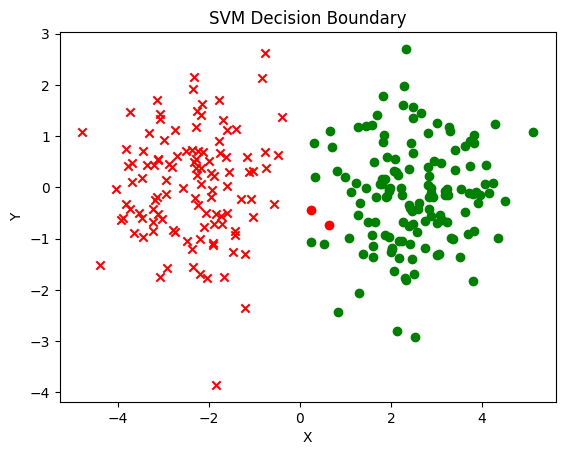

In [72]:
pred_y = [classify_SVM(i[:-1],xs, ys, a, b, lin_ker) for i in d_test]
plot_preds(pred_y, "SVM Decision Boundary")

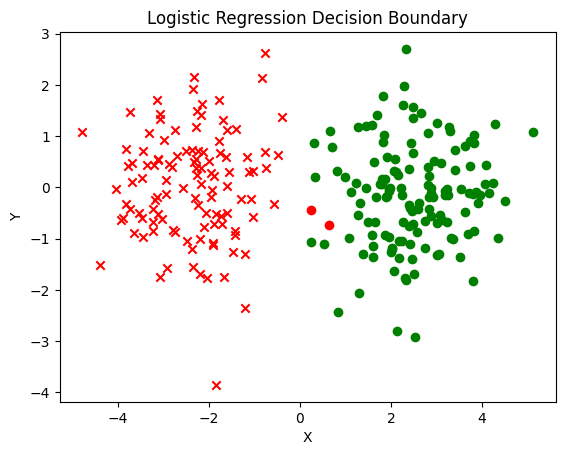

In [74]:
pred_y = [classify_LR(i[:-1],xs, ys, a, b, lin_ker) for i in d_test]
plot_preds(pred_y, "Logistic Regression Decision Boundary")

KNN accuracy: 0.996


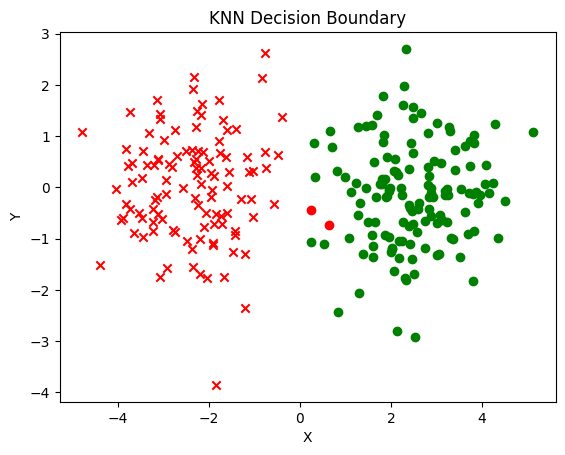

In [56]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=70)
knn.fit(xs, ys)

acc_knn = knn.predict(d_valid[:,:-1])
acc_knn = (acc_knn == d_valid[:,-1]).sum() / len(d_valid)
print("KNN accuracy:", acc_knn)

pred_y = knn.predict(d_test[:,:-1])
plot_preds(pred_y, "KNN Decision Boundary")

NB accuracy: 0.996


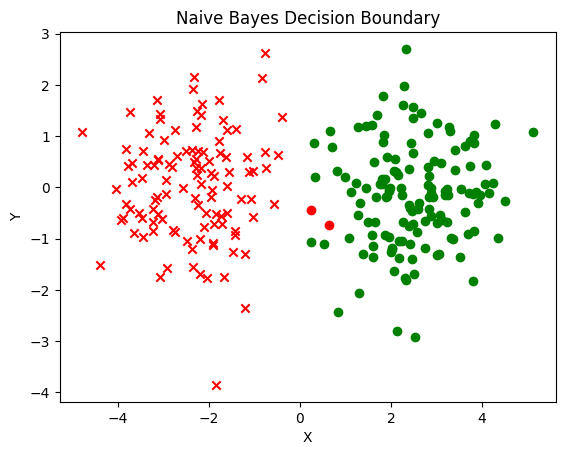

In [57]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(xs, ys)
acc_nb = nb.predict(d_valid[:,:-1])
acc_nb = (acc_nb == d_valid[:,-1]).sum() / len(d_valid)
print("NB accuracy:", acc_nb)

pred_y = nb.predict(d_test[:,:-1])
plot_preds(pred_y, "Naive Bayes Decision Boundary")

In [75]:
accs_nb = []
accs_svm = []
accs_lr = []
accs_knn = []
ms = np.linspace(1, 2.4, int((2.4 - 1) / 0.2))
for m in ms:
    pos_2 = np.concatenate((np.random.multivariate_normal([m, 0], cov, n_pts), np.ones((n_pts, 1))), axis=1)
    neg_2 = np.concatenate((np.random.multivariate_normal([-m, 0], cov, n_pts), -np.ones((n_pts, 1))), axis=1)
    pts_2 = np.concatenate((pos_2, neg_2))
    np.random.shuffle(pts_2)

    d_train_2 = pts[:1000]
    d_valid_2 = pts[1000:1250]
    d_test_2 = pts[1250:]

    xs = d_train_2[:,:-1]
    ys = d_train_2[:,-1]

    testxs = d_test_2[:,:-1]
    testys = d_test_2[:,-1]

    nb = GaussianNB()
    nb.fit(xs, ys)
    acc_nb = nb.predict(testxs)
    acc_nb = (acc_nb == testys).sum() / len(d_valid)
    accs_nb.append(acc_nb)

    knn = KNeighborsClassifier(n_neighbors=70)
    knn.fit(xs, ys)
    acc_knn = nb.predict(testxs)
    acc_knn = (acc_knn == testys).sum() / len(d_valid)
    accs_knn.append(acc_knn)

    a, b = train_params(xs, ys, 0.5, lin_ker)
    acc_svm = 0
    acc_lr = 0
    for i in range(len(testxs)):
        if classify_SVM(testxs[i], xs, ys, a, b, lin_ker) == testys[i]:
            acc_svm += 1
        if classify_LR(testxs[i], xs, ys, a, b, lin_ker) == testys[i]:
            acc_lr += 1
    accs_svm.append(acc_svm / len(d_valid))
    accs_lr.append(acc_lr / len(d_valid))


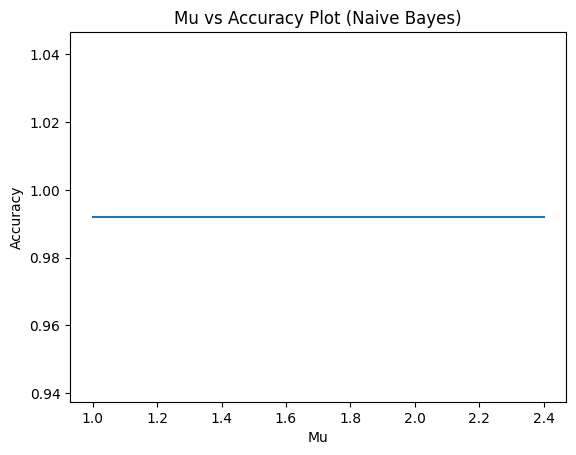

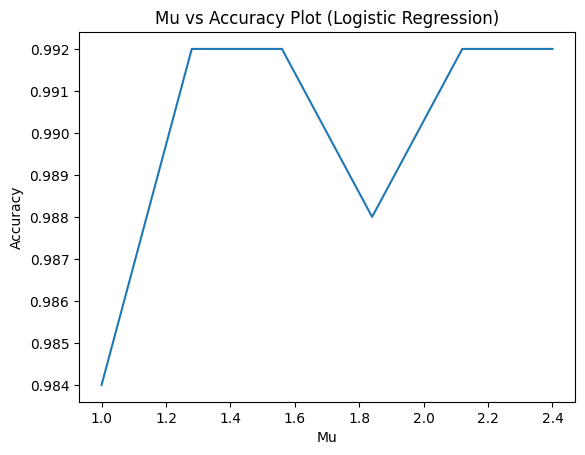

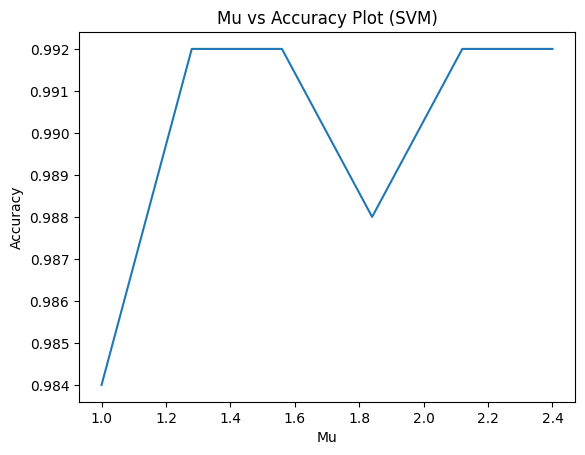

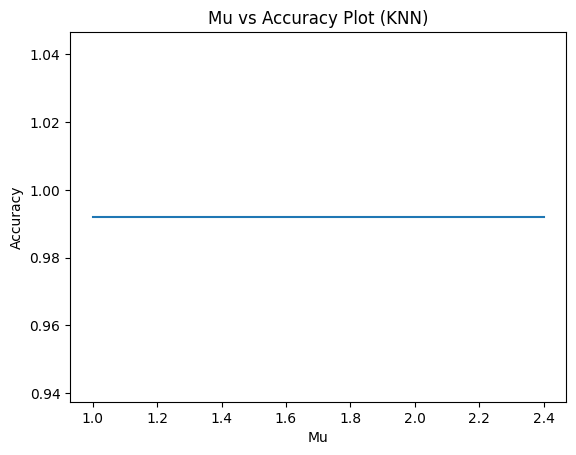

<Figure size 640x480 with 0 Axes>

In [76]:
plots = [accs_nb, accs_lr, accs_svm, accs_knn]
titles = ["Naive Bayes", "Logistic Regression", "SVM", "KNN"]
for i in range(4):
    plt.plot(ms, plots[i])
    plt.title("Mu vs Accuracy Plot (" + titles[i] + ")")
    plt.xlabel("Mu")
    plt.ylabel("Accuracy")
    plt.show()
    plt.clf()

In [78]:
from sklearn.datasets import make_circles

X, y = make_circles(1500, shuffle=True)
train_X = X[:1000]
train_y = y[:1000]

valid_X = X[1000:1250]
valid_y = y[1000:1250]

test_X = X[1250:]
test_y = y[1250:]


a_lin, b_lin = train_params(train_X, train_y, 0.5, lin_ker)


In [83]:
def plot_pred(pred_y, title, test_x, test_y):
    for i in range(len(d_test)):
        x = test_x[i]
        y = test_y[i]
        color = "g" if y == 1 else "r"  # actual
        mark = "o" if pred_y[i] == 1 else "x"
        plt.scatter(x[0], x[1], c=color, marker=mark)
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

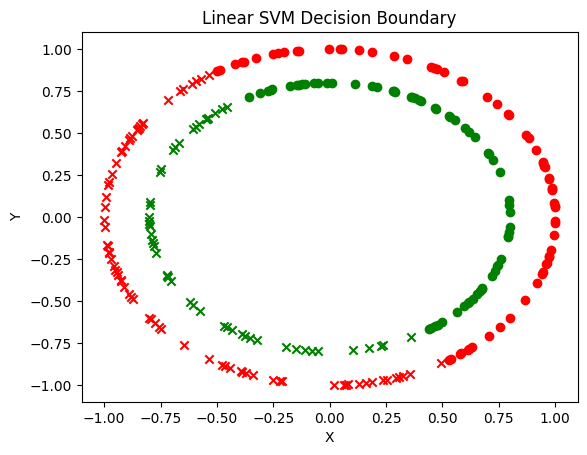

In [85]:
pred_y = [classify_SVM(i,train_X, train_y, a_lin, b_lin, lin_ker) for i in test_X]
plot_pred(pred_y, "Linear SVM Decision Boundary", test_X, test_y)

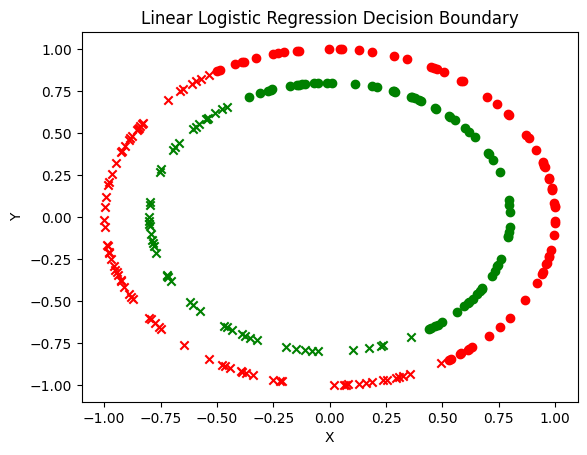

In [87]:
pred_y = [classify_LR(i,train_X, train_y, a_lin, b_lin, lin_ker) for i in test_X]
plot_pred(pred_y, "Linear Logistic Regression Decision Boundary", test_X, test_y)

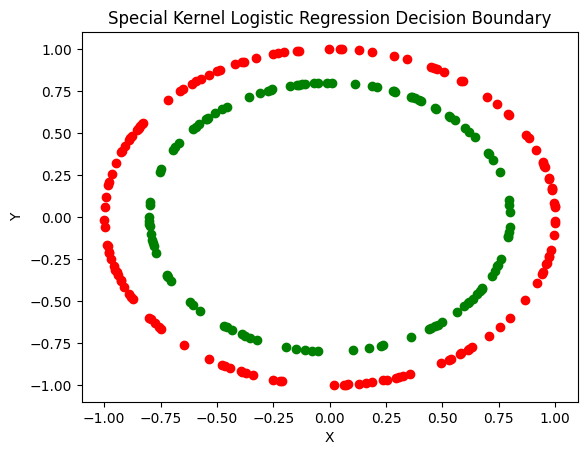

In [91]:
a_spec, b_spec = train_params(train_X, train_y, 0.5, spec_ker)
pred_y = [classify_LR(i,train_X, train_y, a_spec, b_spec, spec_ker) for i in test_X]
plot_pred(pred_y, "Special Kernel Logistic Regression Decision Boundary", test_X, test_y)

correct: 0.428


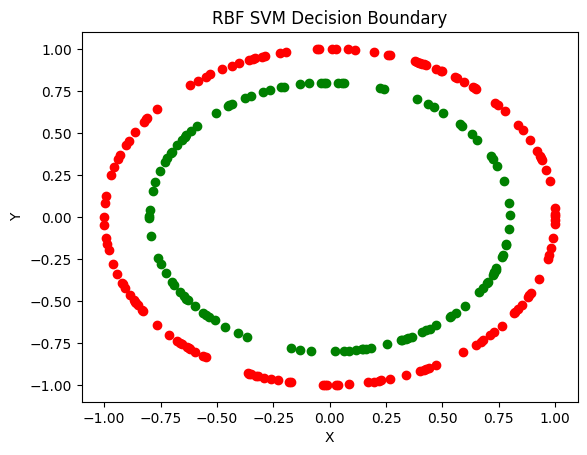

In [171]:
def rbf_ker(a, b, l=1):
    return np.exp(- np.linalg.norm(a - b)**2 / (2 * l ** 2))

a_rbf, b_rbf = train_params(train_X, train_y, 1, rbf_ker)
pred_y = [classify_SVM(i,train_X, train_y, a_rbf, b_rbf, rbf_ker) for i in valid_X]
print("correct:", np.sum(pred_y == valid_y) / len(valid_X))
plot_pred(pred_y, "RBF SVM Decision Boundary", valid_X, valid_y)

correct: 0.372


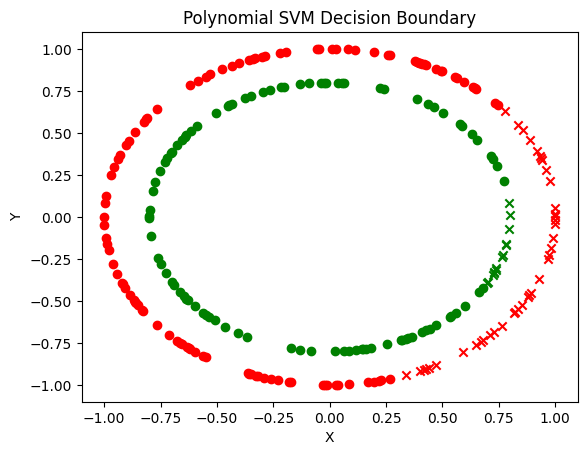

In [170]:
def poly_ker(a, b, d=3, c=1e-3):
    return (np.dot(a, b) + c) ** d

a_poly, b_poly = train_params(train_X, train_y, 1, poly_ker)
pred_y = [classify_SVM(i,train_X, train_y, a_poly, b_poly, poly_ker) for i in valid_X]
print("correct:", np.sum(pred_y == valid_y) / len(valid_X))
plot_pred(pred_y, "Polynomial SVM Decision Boundary", valid_X, valid_y)

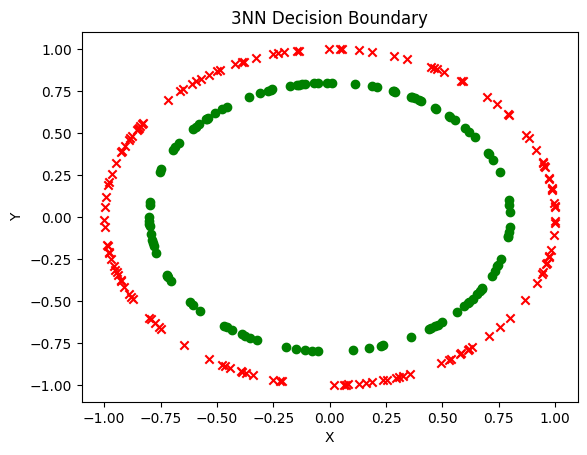

In [148]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_X, train_y)
pred_y = knn.predict(test_X)
plot_pred(pred_y, "3NN Decision Boundary", test_X, test_y)

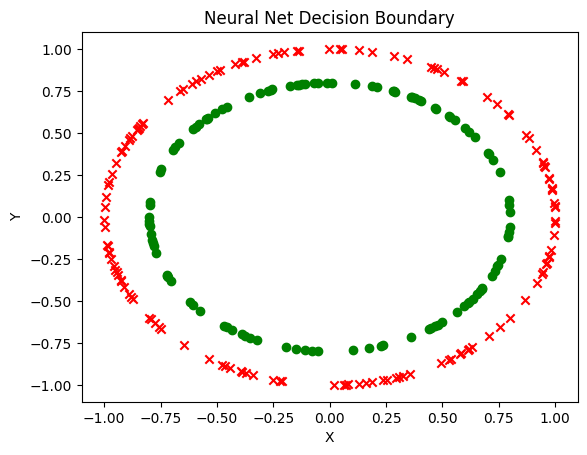

In [173]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(10, 300, 500, 300, 10), activation="tanh", solver="lbfgs")
nn.fit(train_X, train_y)
pred_y = nn.predict(test_X)
round = np.vectorize(lambda a: -1 if a < 0 else 1)
round(pred_y)

plot_pred(pred_y, "Neural Net Decision Boundary", test_X, test_y)

In [224]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)
all_data = np.concatenate((X, y[:,np.newaxis]), axis=1)
np.random.shuffle(all_data)
train_X = all_data[:300, :-1]
train_y = all_data[:300,-1]

valid_X = all_data[300:430, :-1]
valid_y = all_data[300:430, -1]

test_X = all_data[430:,:-1]
test_y = all_data[430:,-1]



In [225]:
def check_accuracy(a, b):
    print("correct:", np.sum(a == b) / len(b))

In [226]:
a_lin, b_lin = train_params(train_X, train_y, 1, lin_ker)
pred_y = [classify_SVM(i,train_X, train_y, a_lin, b_lin, lin_ker) for i in test_X]
check_accuracy(pred_y, test_y)
pred_y = [classify_LR(i,train_X, train_y, a_lin, b_lin, lin_ker) for i in test_X]
check_accuracy(pred_y, test_y)

correct: 0.6258992805755396
correct: 0.6258992805755396


In [227]:
def rbf_ker(a, b, l=10000):
    return np.exp(- np.linalg.norm(a - b) ** 2 / (2 * l ** 2))

a_rbf, b_rbf = train_params(train_X, train_y, 1, rbf_ker)
pred_y = [classify_SVM(i,train_X, train_y, a_rbf, b_rbf, rbf_ker) for i in test_X]
check_accuracy(pred_y, test_y)

correct: 0.6258992805755396


In [228]:
def poly_ker(a, b, d=20, c=10):
    return (np.dot(a, b) + c) ** d

a_poly, b_poly = train_params(train_X, train_y, 1, poly_ker)
pred_y = [classify_SVM(i,train_X, train_y, a_poly, b_poly, poly_ker) for i in test_X]
check_accuracy(pred_y, test_y)

correct: 0.6258992805755396


In [230]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_y)
pred_y = knn.predict(test_X)
check_accuracy(pred_y, test_y)

correct: 0.9496402877697842


In [194]:

nn = MLPClassifier(hidden_layer_sizes=(10, 300, 500, 300, 10), activation="tanh", solver="lbfgs")
nn.fit(train_X, train_y)
pred_y = nn.predict(test_X)
round = np.vectorize(lambda a: 0 if a < 0 else 1)
round(pred_y)
check_accuracy(pred_y, test_y)

correct: 0.8920863309352518


/Users/ayun/CODE/Classes/UW/UW-CS/CS760/HW7/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
